In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
data_path = "data/data_complete.csv"
import pandas as pd

data = pd.read_csv(data_path)
data = data.iloc[:, 2:]
# data.corr()
data

,y,number_of_beds,markaze_behdasht,number_of_labs,number_of_active_beds,number_of_employees,number_of_doctors,number_of_pir_doctors,number_of_stuff,number_of_persons_in_hotels,...,number_of_person_bus_inside,number_of_person_bus_outside,number_of_person_minibus_inside,number_of_person_minibus_outside,number_of_person_car_inside,number_of_person_car_outside,covid,month,season,y_last
0,1664.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352.0,618303.0,12874.0,9411.0,755.0,2500.0,0.0,1,1,2615.442105
1,2027.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352.0,618303.0,12874.0,9411.0,755.0,2500.0,0.0,2,1,1664.000000
2,2186.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352.0,618303.0,12874.0,9411.0,755.0,2500.0,0.0,3,1,2027.000000
3,1800.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352.0,618303.0,12874.0,9411.0,755.0,2500.0,0.0,4,2,2186.000000
4,2216.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352.0,618303.0,12874.0,9411.0,755.0,2500.0,0.0,5,2,1800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3581.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9200.000000,...,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0,0.0,8,3,3162.000000
92,3570.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9225.000000,...,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0,0.0,9,3,3581.000000
93,3049.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9225.000000,...,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0,0.0,10,4,3570.000000
94,3122.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9238.000000,...,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0,0.0,11,4,3049.000000


In [97]:
import DataLoader, Machine_Model, Engine, Information
import torch
seed = 45
# pres = [0.0246, 0.025, 0.0254, 0.0271, 0.0279, 0.0396, 0.0404] # [0.0279, 0.0271, 0.0404, 0.0396, 0.025]
train_percent = 0.7
val_percent = 0.3
test_percent = None
batch_size = 100
torch.manual_seed(seed)

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                    test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

# INPUT_SIZE = len(Information.features)
INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4
torch.manual_seed(seed)
model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)
torch.manual_seed(seed)
model1 = Machine_Model.NN_V0(input_size=17, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS_list = [1410, 1413, 1777]
EPOCHS = EPOCHS_list[2]
# EPOCHS = 3000
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0279
weight_decay = 0.055
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)
optimizer1 = torch.optim.Adam(model1.parameters(), learning_rate, weight_decay=weight_decay)

torch.manual_seed(seed)
engine = Engine.Machine_Engine(model=model0, model1=model1, train_dataloader=train, val_dataloader=val,
                            test_dataloader=test)
torch.manual_seed(seed)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, optimizer1=optimizer1, epochs_num=EPOCHS,
                            early_stop_patience=None, writer=False, resolution=1)


1 1


  0%|          | 0/1777 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.632898 Accuracy -22.2105 | validation: Loss 0.129542 Accuracy -7.1382
Epoch 2 | train: Loss 0.085668 Accuracy -2.1417 | validation: Loss 0.061190 Accuracy -2.8441
Epoch 3 | train: Loss 0.067722 Accuracy -1.4836 | validation: Loss 0.181067 Accuracy -10.3752
Epoch 4 | train: Loss 0.139750 Accuracy -4.1251 | validation: Loss 0.052961 Accuracy -2.3271
Epoch 5 | train: Loss 0.045660 Accuracy -0.6745 | validation: Loss 0.099958 Accuracy -5.2797
Epoch 6 | train: Loss 0.065954 Accuracy -1.4188 | validation: Loss 0.051594 Accuracy -2.2413
Epoch 7 | train: Loss 0.060840 Accuracy -1.2312 | validation: Loss 0.011965 Accuracy 0.2483
Epoch 8 | train: Loss 0.027845 Accuracy -0.0212 | validation: Loss 0.045079 Accuracy -1.8320
Epoch 9 | train: Loss 0.062319 Accuracy -1.2854 | validation: Loss 0.035827 Accuracy -1.2508
Epoch 10 | train: Loss 0.047508 Accuracy -0.7423 | validation: Loss 0.014081 Accuracy 0.1154
Epoch 11 | train: Loss 0.024397 Accuracy 0.1053 | validation: Loss 0.

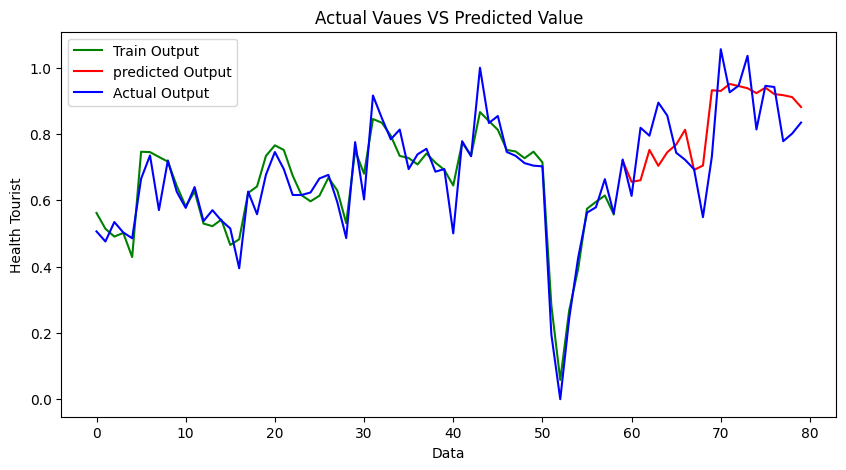

In [98]:
engine.plot_predict_real()

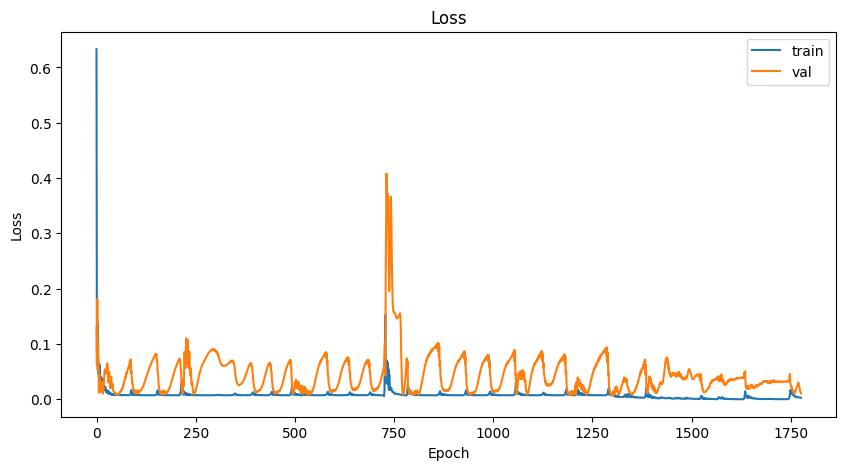

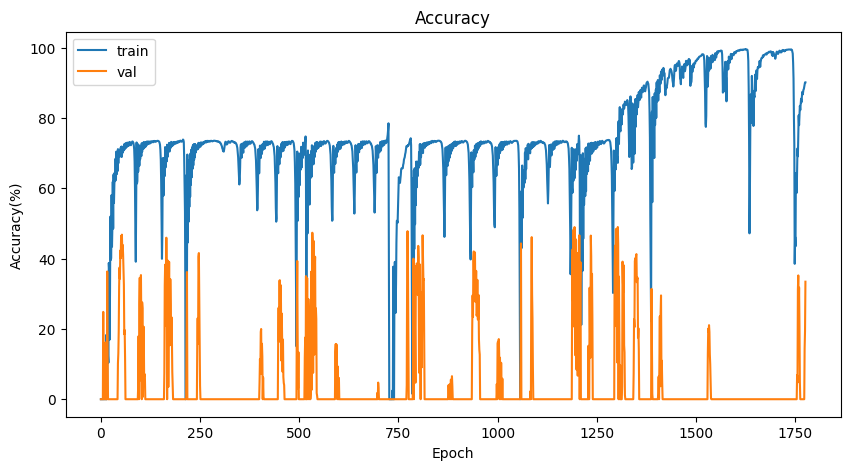

In [100]:
engine.plot_loss()
engine.plot_acc()

In [101]:
engine.save()

In [ ]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [102]:
dataloader.scaler_y.inverse_transform(engine.ys)

array([[2860.8813],
       [2658.3875],
       [2673.7876],
       [2965.0305],
       [2812.3303],
       [2942.8152],
       [3016.6838],
       [3158.9995],
       [2772.727 ],
       [2815.1633],
       [3538.33  ],
       [3532.1099],
       [3599.0664],
       [3579.058 ],
       [3557.9473],
       [3510.812 ],
       [3563.7153],
       [3501.8062],
       [3491.3872],
       [3472.835 ],
       [3377.545 ]], dtype=float32)

In [103]:
import numpy as np
x3 = np.array([[2870, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2780, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2319, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2901, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [3933, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3519, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3583, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3870, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0]])


In [39]:
for i in range(7,8):
    name = Information.features[i]
    x3 = data[Information.features].iloc[88:,:]
    x2 = x3.iloc[:, i]
    x2[95] = x2[95]+1

    engine.predict(x3, dataloader.scaler_y, dataloader.scaler_x, n=12)
    engine.prediction.to_csv(f"data_distinc/health_prediction_{name}.csv")
    engine.prediction = None

C:\Users\keipj\AppData\Local\Temp\ipykernel_736\3139872168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[95] = x2[95]+1


In [94]:
engine.predict(x3, dataloader.scaler_y, dataloader.scaler_x, n=12)

<bound method Machine_Engine.predict of <Engine.Machine_Engine object at 0x0000016E880EAB50>>

In [95]:
engine.prediction.to_csv("health_prediction_covid.csv")

# Deployment of Health model

In [8]:
import Machine_Model, Engine, Information
from pathlib import Path
import torch

INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4

model1 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)
model2 = Machine_Model.NN_V0(input_size=17, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

model1_path = "Health_RNN_V0_N1.pt"
model2_path = "Health_RNN_V0_N2.pt"

model1.load_state_dict(torch.load("model/RNN/" + model1_path))
model2.load_state_dict(torch.load("model/RNN/" + model2_path))

model1_size = Path("model/RNN", model1_path).stat().st_size // (1024)
model2_size = Path("model/RNN", model2_path).stat().st_size // (1024)
print(f"model 1 size: {model1_size} KB")
print(f"model 2 size: {model2_size} KB")

model 1 size: 43 KB
model 2 size: 2 KB


In [10]:
health_demo_path = Path("demos/Health_Tourists/")
health_demo_path.mkdir(parents=True, exist_ok=True)

In [ ]:
%%writefile demos/Health_Tourists/model.py
import torch
import torchvision
from torch import nn


def create_effnetb2_model(num_classes:int=101,
                          seed:int=42):
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    for param in model.parameters():
        param.requires_grad = False
        
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes)
    )
    
    return model, transforms